## data acquisition and preprocessing

In [1]:
import tushare as ts
import torch
import pandas as pd

In [2]:
print(f'tushare version:{ts.__version__}')
print(f'torch version:{torch.__version__}')
print(f'pandas version:{pd.__version__}')

tushare version:1.2.62
torch version:1.3.1
pandas version:0.20.3


In [4]:
class Args:
    def __init__(self):
        self.stock_code = '000001.SH'
        self.startdate = '20100901'
        self.enddate = '20190901'
        self.predict_col='close'
        self.ratio = 0.2
        self.window_size = 100
        self.input_dim = 1
        self.hidden_dim = 32
        self.num_layers = 2
        self.output_dim = 1
        self.num_epochs = 100

args = Args()
ts.set_token('7f8ad26697fe90fd4e46dce39b5dc1f2276f3846af3061e029367c09')
pro = ts.pro_api()
df = pro.index_daily(ts_code=args.stock_code, start_date=args.startdate, end_date=args.enddate)
df1 = pd.DataFrame(df)
path = args.stock_code + '.csv'
df1.to_csv(path)

In [5]:
df1

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,000001.SH,20190830,2886.2365,2907.3825,2914.5767,2874.1028,2890.9192,-4.6827,-0.1620,193959951.0,2.247512e+08
1,000001.SH,20190829,2890.9192,2895.9991,2898.6046,2878.5878,2893.7564,-2.8372,-0.0980,178613082.0,1.963328e+08
2,000001.SH,20190828,2893.7564,2901.6267,2905.4354,2887.0115,2902.1932,-8.4368,-0.2907,183097903.0,2.018051e+08
3,000001.SH,20190827,2902.1932,2879.5154,2919.6444,2879.4060,2863.5673,38.6259,1.3489,208141794.0,2.309997e+08
4,000001.SH,20190826,2863.5673,2851.0158,2870.4939,2849.2381,2897.4253,-33.8580,-1.1686,169895363.0,1.910367e+08
5,000001.SH,20190823,2897.4253,2885.1510,2902.4563,2878.7443,2883.4358,13.9895,0.4852,159156826.0,1.925671e+08
6,000001.SH,20190822,2883.4358,2887.6649,2888.4969,2867.5522,2880.3307,3.1051,0.1078,149206215.0,1.696622e+08
7,000001.SH,20190821,2880.3307,2875.4708,2885.5861,2872.5573,2880.0012,0.3295,0.0114,159019665.0,1.831873e+08
8,000001.SH,20190820,2880.0012,2879.0816,2892.0796,2874.9988,2883.0960,-3.0948,-0.1073,189677206.0,2.097743e+08
9,000001.SH,20190819,2883.0960,2835.5181,2883.0960,2829.8542,2823.8238,59.2722,2.0990,214546668.0,2.470922e+08


In [6]:
df1 = df1[['trade_date','open', 'high', 'close', 'low', 'vol', 'change']]
df1 = df1.sort_values(by='trade_date')

In [7]:
df1

,trade_date,open,high,close,low,vol,change
2187,20100901,2641.0530,2662.8760,2622.8820,2604.4870,127164940.0,-15.9160
2186,20100902,2646.8930,2659.9780,2655.7760,2636.4180,124076238.0,32.8940
2185,20100903,2658.1290,2660.5390,2655.3940,2631.8510,129456526.0,-0.3820
2184,20100906,2667.1950,2698.6010,2696.2500,2664.2390,144209066.0,40.8560
2183,20100907,2698.2180,2704.9330,2698.3630,2679.0230,112231539.0,2.1130
2182,20100908,2687.7110,2695.8450,2695.2910,2674.3210,113519409.0,-3.0720
2181,20100909,2698.6380,2698.6380,2656.3520,2651.6020,132989434.0,-38.9390
2180,20100910,2657.2350,2667.8370,2663.2090,2628.8290,113041151.0,6.8570
2179,20100913,2665.6550,2696.6740,2688.3200,2660.6070,117918914.0,25.1110
2178,20100914,2694.0690,2703.7810,2688.5220,2678.9740,120712410.0,0.2020


In [8]:
from sklearn.preprocessing import MinMaxScaler

price = df1[[args.predict_col]]
scaler = MinMaxScaler(feature_range=(-1, 1))
price.loc[:,args.predict_col] = scaler.fit_transform(price[args.predict_col].values.reshape(-1,1))

import numpy as np

'''
    for the input stock,
    slice it for a lookback size and make one step further,
    ratio determines the size of train and test set,
    choose the last price of every slice as label
'''
def split_data(stock, ratio=0.2):
    data = stock
    data = np.array(data);
    test_set_size = int(np.round(ratio*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    train_data = data[:train_set_size]
    test_data = data[train_set_size:]
    
    return [train_data,test_data]

train_data,test_data = split_data(price.values,args.ratio)

D:\Anaconda\envs\pytorch3.6\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [9]:
N = len(train_data)

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):
    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(pred_idx)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00058


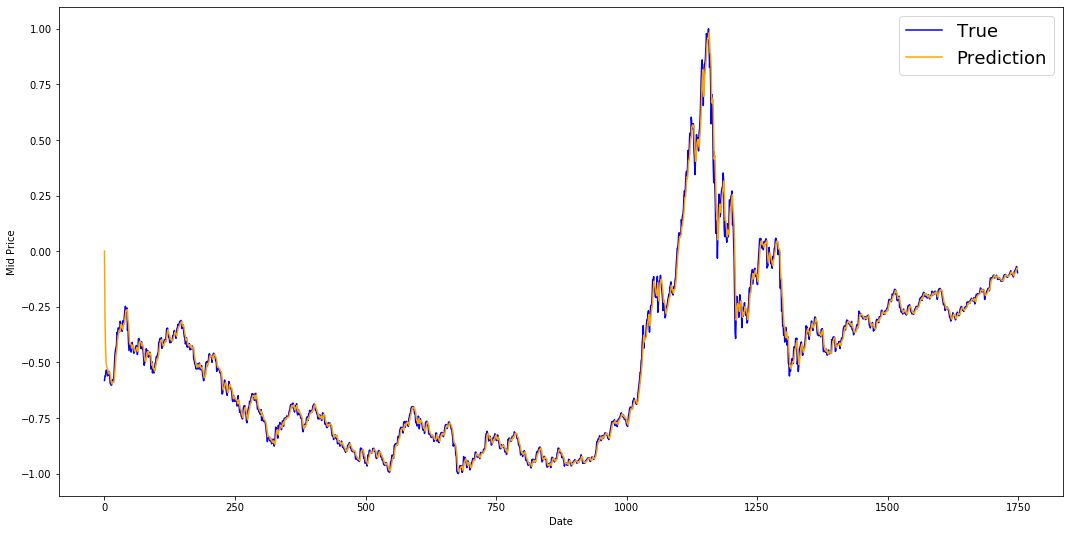

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize = (18,9))
plt.plot(range(0,N),price.iloc[:N,0],color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [12]:
N = len(test_data)

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):
    running_mean = running_mean*decay + (1.0-decay)*test_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-test_data[pred_idx])**2)
    run_avg_x.append(pred_idx)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00034


In [16]:
pred = np.array(run_avg_predictions[1:N])>np.array(test_data[0:N-1])
true = np.array(test_data[1:N])>np.array(test_data[0:N-1])
np.mean(pred==true)

0.5034324942791762